# Notebook 1 - Extracting XY Coordinates from Vector Data
`GemGIS` is a Python-based, open-source geographic information processing library.
It is capable of preprocessing spatial data such as vector data (shape files, geojson files,
geopackages), raster data (tif, png,...), data obtained from web services (WMS, WFS, WCS) or XML/KML
files. Preprocessed data can be stored in a dedicated Data Class to be passed to the geomodeling package
`GemPy` (https://github.com/cgre-aachen/gempy) in order to accelerate to model building process. In addition, enhanced 3D visualization of data is
powered by the `PyVista` (https://github.com/pyvista/pyvista) package.

# Content

[Overview](#overview) <br>
[Load Libraries](#libraries) <br>
[What are GeoDataFrames?](#gdfs) <br>
[Example 1 - Point Data](#ex1) <br>
[Example 2 - LineString Data](#ex2) <br>
[Example 3 - Polygon Data](#ex3) <br>
[Example 4 - Extract Data from any type of Geometry](#ex4) <br>
[Summary](#summary) <br>


<a id='overview'></a>
# Overview

This notebook will present how to extract X and Y coordinates from vector data (shape files, geojsons, geopackages) loaded as GeoDataFrame using `GeoPandas` (https://github.com/geopandas/geopandas). This vector data consists of either `Point` data, `LineString` data, `MultiLineString` data or `Polygon` data. We will use a sample geological map to introduce the functionality of the different functions. The data was prepared in QGIS as shown below. 

<img src="../data/Images/qgis.png" width="600">

The aim of this and the upcoming tutorials is to demonstrate how to prepare spatial data for geomodeling with `GemPy` to get a geological model like shown below. 

<img src="../data/Images/cover.png" width="600">

<a id='libraries'></a>
# Load Libraries

Firstly, we import the necessary libraries that we need for the extraction of X and Y coordinates. This includes the `GemGIS` library, `GeoPandas` to work with vector data and `Matplotlib` (https://github.com/matplotlib/matplotlib) for plotting. `Pandas` (https://github.com/pandas-dev/pandas) is needed for the manipulation of tables. 

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

import sys
sys.path.append('../../gemgis')
import gemgis as gg
print(gg.__version__)

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\ale93371\Anaconda3\envs\test_gempy\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


0.2.0


<a id='gdfs'></a>
# What are GeoDataFrames? 

GeoDataFrames are Pandas DataFrames with an additional `geometry` column. This geometry column is also called a `GeoSeries`. It is a vector where each entry in the vector is a set of shapes corresponding to one observation. An entry may consist of only one shape (like a single polygon) or multiple shapes that are meant to be thought of as one observation (like the many polygons that make up the State of Hawaii or a country like Indonesia).

`GeoPandas` has three basic classes of geometric objects (which are actually `shapely` objects):

- Points / Multi-Points
- Lines / Multi-Lines
- Polygons / Multi-Polygons

Source: https://geopandas.org/data_structures.html

In [2]:
gdf = gpd.read_file('../data/Test1/interfaces1.shp')
gdf.head()

,id,formation,geometry
0,None,Ton,POINT (19.150 293.313)
1,None,Ton,POINT (61.934 381.459)
2,None,Ton,POINT (109.358 480.946)
3,None,Ton,POINT (157.812 615.999)
4,None,Ton,POINT (191.318 719.094)


A `GeoDataFrame` has many different attributes. The most important ones are shown below.

In [3]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
gdf.geometry[:5]

In [4]:
gdf.geom_type[:5]

0    Point
1    Point
2    Point
3    Point
4    Point
dtype: object

In [5]:
gdf.bounds.head()

,minx,miny,maxx,maxy
0,19.15,293.31,19.15,293.31
1,61.93,381.46,61.93,381.46
2,109.36,480.95,109.36,480.95
3,157.81,616.00,157.81,616.00
4,191.32,719.09,191.32,719.09


In [6]:
gdf.total_bounds

array([   8.84067296,  164.9607695 ,  966.07357798, 1045.38823411])

In [7]:
gdf.is_valid[:5]

0    True
1    True
2    True
3    True
4    True
dtype: bool

As mentioned above, every entry of the `GeoDataFrame` is basically a shapely object, in this case a point:

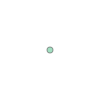

In [8]:
gdf.loc[0].geometry

In [9]:
type(gdf.loc[0].geometry)

shapely.geometry.point.Point

Depending on the geometry types in your GeoDataFrame other attributes may be available such as `gdf.length` to return the lengths of LineStrings or `gdf.area` to return the area of Polygons.

<a id='ex1'></a>
# Example 1 - Point Data

## Load Data

As a first example to show how to extract X and Y coordinates from vector data, we are loading a shape file containing point information. Additional columns are `id`, which was not recorded when digitizing the data and `formation` indicating the base of the formation that was encountered at a particular point. This will become important in future tutorials. The term `Ton` is German for clay and indicates in this example the boundary between a sandstone layer and a claystone layer. 

In [10]:
gdf = gpd.read_file('../data/Test1/interfaces1.shp')
gdf.head()

,id,formation,geometry
0,None,Ton,POINT (19.150 293.313)
1,None,Ton,POINT (61.934 381.459)
2,None,Ton,POINT (109.358 480.946)
3,None,Ton,POINT (157.812 615.999)
4,None,Ton,POINT (191.318 719.094)


## Inspecting the Data

Firstly, we can inspect the data that we have loaded.

In [11]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [12]:
len(gdf)

41

In [ ]:
gdf.geometry[:5]

In [13]:
gdf.geom_type[:5]

0    Point
1    Point
2    Point
3    Point
4    Point
dtype: object

In [14]:
gdf.bounds.head()

,minx,miny,maxx,maxy
0,19.15,293.31,19.15,293.31
1,61.93,381.46,61.93,381.46
2,109.36,480.95,109.36,480.95
3,157.81,616.00,157.81,616.00
4,191.32,719.09,191.32,719.09


In [15]:
gdf.total_bounds

array([   8.84067296,  164.9607695 ,  966.07357798, 1045.38823411])

In [16]:
gdf.is_valid[:5]

0    True
1    True
2    True
3    True
4    True
dtype: bool

As mentioned above, every entry of the `GeoDataFrame` is basically a shapely object, in this case a point:

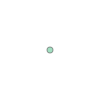

In [17]:
gdf.loc[0].geometry

In [18]:
type(gdf.loc[0].geometry)

shapely.geometry.point.Point

## Plotting Data

The data can be plotted using the built-in `GeoPandas` plotting functions and by adding additional `Matplotlib` commands like grids or axes labels.

Text(130.36971370023429, 0.5, 'Y [m]')

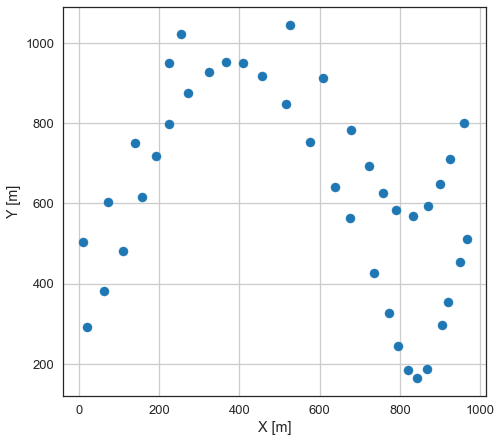

In [19]:
gdf.plot(aspect='equal')
plt.grid()
plt.xlabel('X [m]')
plt.ylabel('Y [m]')

## Extracting XY Coordinates

For the geomodeling with `GemPy` or other packages, the X and Y coordinates of the `shapely` points need to be extracted. The extraction of the X and Y values for points is relatively straight forward. The X and Y coordinates for points can be accessed using `gdf.geometry.x` and `gdf.geometry.y`. This functionality is also combined in the function `extract_xy_points`. 

The signature of the function is shown below:

```Signature:
gg.vector.extract_xy_points(
    gdf: geopandas.geodataframe.GeoDataFrame,
    reset_index: bool = True,
    drop_id: bool = True,
    drop_index: bool = True,
    overwrite_xy: bool = False,
    target_crs: str = None,
    bbox: Union[Sequence[float], NoneType] = None,
) -> geopandas.geodataframe.GeoDataFrame
Docstring:
Extracting x,y coordinates from a GeoDataFrame (Points) and returning a GeoDataFrame with x,y
coordinates as additional columns
Args:
    gdf (gpd.geodataframe.GeoDataFrame): GeoDataFrame created from vector data containing elements of geom_type Point
    reset_index (bool): Variable to reset the index of the resulting GeoDataFrame, default True
    drop_id (bool): Variable to drop the id column, default True
    drop_index (bool): Variable to drop the index column, default True
    overwrite_xy (bool): Variable to overwrite existing X and Y values, default False
    target_crs (str, pyproj.crs.crs.CRS): Name of the CRS provided to reproject coordinates of the GeoDataFrame
    bbox (list): Values (minx, maxx, miny, maxy) to limit the extent of the data
Return:
    gdf (gpd.geodataframe.GeoDataFrame): GeoDataFrame with appended x,y columns and optional columns```

In [20]:
gdf.geometry.x[:5]

0    19.15
1    61.93
2   109.36
3   157.81
4   191.32
dtype: float64

In [21]:
gdf.geometry.y[:5]

0   293.31
1   381.46
2   480.95
3   616.00
4   719.09
dtype: float64

## Extracting X and Y coordinates using GemGIS

In its simplest version, `extract_xy_points` will return a `GeoDataFrame` with Points as geometry type, an additional `X` and `Y`column and the remaining columns of the original `gdf`. The `id` column will be dropped by default as it is usally not used when creating the data in your GIS software.

In [22]:
gdf_coordinates = gg.vector.extract_xy_points(gdf)
gdf_coordinates.head()

,formation,geometry,X,Y
0,Ton,POINT (19.150 293.313),19.15,293.31
1,Ton,POINT (61.934 381.459),61.93,381.46
2,Ton,POINT (109.358 480.946),109.36,480.95
3,Ton,POINT (157.812 615.999),157.81,616.00
4,Ton,POINT (191.318 719.094),191.32,719.09


An argument `reset_index=False` can be passed to prevent resetting the index. However, this will have no effect on `extract_xy_points` unless the data is cropped as shown below.

In [23]:
gdf_coordinates = gg.vector.extract_xy_points(gdf, reset_index=False)
gdf_coordinates.head()

,formation,geometry,X,Y
0,Ton,POINT (19.150 293.313),19.15,293.31
1,Ton,POINT (61.934 381.459),61.93,381.46
2,Ton,POINT (109.358 480.946),109.36,480.95
3,Ton,POINT (157.812 615.999),157.81,616.00
4,Ton,POINT (191.318 719.094),191.32,719.09


An argument `drop_id=False` can be passed to prevent dropping the `id` column if it is needed for further processing.

In [24]:
gdf_coordinates = gg.vector.extract_xy_points(gdf, drop_id=False)
gdf_coordinates.head()

,id,formation,geometry,X,Y
0,None,Ton,POINT (19.150 293.313),19.15,293.31
1,None,Ton,POINT (61.934 381.459),61.93,381.46
2,None,Ton,POINT (109.358 480.946),109.36,480.95
3,None,Ton,POINT (157.812 615.999),157.81,616.00
4,None,Ton,POINT (191.318 719.094),191.32,719.09


A `target_crs` can be provided with an EPSG code as string or a pyproj CRS object (https://pyproj4.github.io/pyproj/dev/api/crs/crs.html) to reproject the current coordinates into a different Coordinate Reference System (=CRS). As we deal with a Long/Lat coordinate system here, the reprojection will fail. Therefore, we pass the original CRS again.

In [25]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [26]:
gdf_coordinates = gg.vector.extract_xy_points(gdf, target_crs='EPSG:4326')
gdf_coordinates.head()

,formation,geometry,X,Y
0,Ton,POINT (19.150 293.313),19.15,293.31
1,Ton,POINT (61.934 381.459),61.93,381.46
2,Ton,POINT (109.358 480.946),109.36,480.95
3,Ton,POINT (157.812 615.999),157.81,616.00
4,Ton,POINT (191.318 719.094),191.32,719.09


A bounding box (`bbox`) containing `minx`, `maxx`, `miny`, `maxy` values can be provided to limit the extent of the data. The original `gdf` consists of 41 elements, the cropped `gdf_coordinates` of only 11 elements. Please notice, that the index was automatically reset. Passing `reset_index=False` will prevent resetting the index.

A clipping of the data can also be performed the same way for LineStrings, MultiLineStrings and Polygons but the demonstration of the feature will be limited to Point data here.

In [27]:
len(gdf)

41

In [28]:
gdf_coordinates = gg.vector.extract_xy_points(gdf, reset_index=True, bbox = [600,850,150,700])
gdf_coordinates

,formation,geometry,X,Y
0,Ton,POINT (638.748 641.773),638.75,641.77
1,Ton,POINT (674.831 563.421),674.83,563.42
2,Ton,POINT (734.111 426.305),734.11,426.31
3,Ton,POINT (771.740 327.335),771.74,327.33
4,Ton,POINT (795.968 245.890),795.97,245.89
5,Ton,POINT (818.648 185.580),818.65,185.58
6,Ton,POINT (841.329 164.961),841.33,164.96
7,Sand,POINT (723.286 693.836),723.29,693.84
8,Sand,POINT (757.307 626.824),757.31,626.82
9,Sand,POINT (790.297 583.525),790.30,583.52


In [29]:
len(gdf_coordinates)

11

The original data and the cropped/clipped data can now be visualized. The red rectangle marks the area that is being kept after the clipping. 

Text(432.7400645933013, 0.5, 'Y [m]')

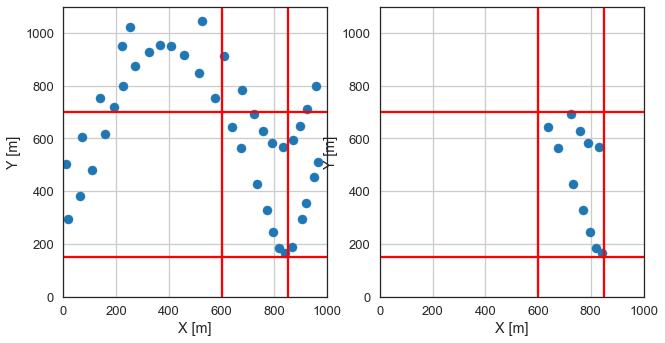

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2)
gdf.plot(ax=ax1, aspect='equal')
ax1.set_xlim(0,1000)
ax1.set_ylim(0,1100)
ax1.grid()

ax1.axhline(700, c='red')
ax1.axhline(150, c='red')
ax1.axvline(600, c='red')
ax1.axvline(850, c='red')
ax1.set_xlabel('X [m]')
ax1.set_ylabel('Y [m]')

gdf_coordinates.plot(ax=ax2, aspect='equal')
ax2.set_xlim(0,1000)
ax2.set_ylim(0,1100)
ax2.grid()

ax2.axhline(700, c='red')
ax2.axhline(150, c='red')
ax2.axvline(600, c='red')
ax2.axvline(850, c='red')
ax2.set_xlabel('X [m]')
ax2.set_ylabel('Y [m]')

The index can also be reset but the old `index` column can be kept if needed for further processing.

In [31]:
gdf_coordinates = gg.vector.extract_xy_points(gdf, reset_index=True, drop_index=False, bbox = [600,850,0,700])
gdf_coordinates

,index,formation,geometry,X,Y
0,13,Ton,POINT (638.748 641.773),638.75,641.77
1,14,Ton,POINT (674.831 563.421),674.83,563.42
2,15,Ton,POINT (734.111 426.305),734.11,426.31
3,16,Ton,POINT (771.740 327.335),771.74,327.33
4,17,Ton,POINT (795.968 245.890),795.97,245.89
5,18,Ton,POINT (818.648 185.580),818.65,185.58
6,19,Ton,POINT (841.329 164.961),841.33,164.96
7,33,Sand,POINT (723.286 693.836),723.29,693.84
8,34,Sand,POINT (757.307 626.824),757.31,626.82
9,35,Sand,POINT (790.297 583.525),790.30,583.52


The index can also be kept when setting `reset_index=False`. 

In [32]:
gdf_coordinates = gg.vector.extract_xy_points(gdf, reset_index=False, bbox = [600,850,0,700])
gdf_coordinates

,formation,geometry,X,Y
13,Ton,POINT (638.748 641.773),638.75,641.77
14,Ton,POINT (674.831 563.421),674.83,563.42
15,Ton,POINT (734.111 426.305),734.11,426.31
16,Ton,POINT (771.740 327.335),771.74,327.33
17,Ton,POINT (795.968 245.890),795.97,245.89
18,Ton,POINT (818.648 185.580),818.65,185.58
19,Ton,POINT (841.329 164.961),841.33,164.96
33,Sand,POINT (723.286 693.836),723.29,693.84
34,Sand,POINT (757.307 626.824),757.31,626.82
35,Sand,POINT (790.297 583.525),790.30,583.52


<a id='ex2'></a>
# Example 2 - LineString Data

## Load Data

As a second example, we are loading a shape file containing line information. Additional columns are `id`, which was not recorded when digitizing the data and `formation` indicating the base of the formation that was encountered at a particular point. This will become important in future tutorials. The term `Ton` is German for clay and indicates in this example the boundary between a sandstone layer and a claystone layer. In this example, the previously mentioned `Sand1` is also present. The same attributes can be inspected again as before. 

In [33]:
gdf = gpd.read_file('../data/Test1/interfaces1_lines.shp')
gdf.head()

,id,formation,geometry
0,None,Sand1,"LINESTRING (0.256 264.862, 10.593 276.734, 17...."
1,None,Ton,"LINESTRING (0.188 495.787, 8.841 504.142, 41.0..."
2,None,Ton,"LINESTRING (970.677 833.053, 959.372 800.023, ..."


In [34]:
gdf.length

<ipython-input-34-621be3730c8a>:1: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf.length


0   2144.71
1    638.63
2    910.15
dtype: float64

In [35]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [36]:
len(gdf)

3

In [ ]:
gdf.geometry[:5]

In [37]:
gdf.geom_type

0    LineString
1    LineString
2    LineString
dtype: object

In [38]:
gdf.bounds.head()

,minx,miny,maxx,maxy
0,0.26,164.96,970.55,957.29
1,0.19,495.79,277.81,1067.49
2,512.24,569.09,970.68,1067.95


In [39]:
gdf.total_bounds

array([1.88186862e-01, 1.64960769e+02, 9.70676625e+02, 1.06795083e+03])

In [40]:
gdf.is_valid

0    True
1    True
2    True
dtype: bool

As mentioned above, every entry of the `GeoDataFrame` is basically a shapely object, in this case a LineString:

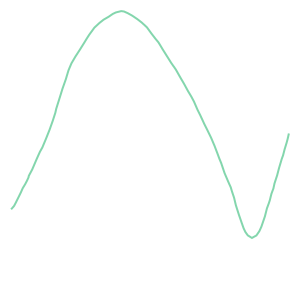

In [41]:
gdf.loc[0].geometry

In [42]:
type(gdf.loc[0].geometry)

shapely.geometry.linestring.LineString

## Plotting Data

The data can be plotted using the built-in `GeoPandas` plotting functions and by adding additional `Matplotlib` commands like grids or axes labels.

Text(132.79633672939792, 0.5, 'Y [m]')

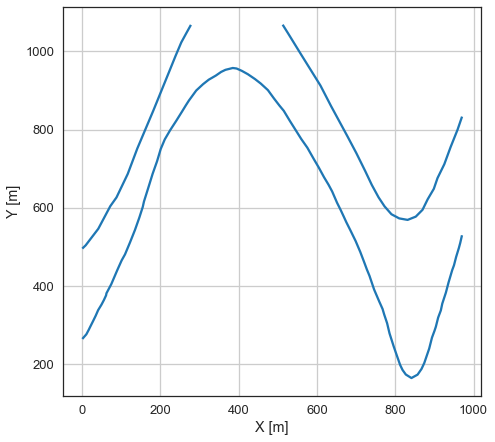

In [43]:
gdf.plot(aspect='equal')
plt.grid()
plt.xlabel('X [m]')
plt.ylabel('Y [m]')

## Extracting XY Coordinates

For the geomodeling with `GemPy` or other packages, the X and Y coordinates of the `shapely` LineStrings need to be extracted. The extraction of the X and Y values for LineStrings is done using list comprehension and the built-in `Pandas` `explode()` method. The functionality of extracting the X and Y coordinates is also combined in the function `extract_xy_linestrings`. 

The signature of the function is shown below:

```Signature:
gg.vector.extract_xy_linestrings(
    gdf: geopandas.geodataframe.GeoDataFrame,
    reset_index: bool = True,
    drop_id: bool = True,
    drop_index: bool = True,
    drop_points: bool = True,
    overwrite_xy: bool = False,
    target_crs: str = None,
    bbox: Union[Sequence[float], NoneType] = None,
) -> geopandas.geodataframe.GeoDataFrame
Docstring:
Extracting x,y coordinates from a GeoDataFrame (LineStrings) and returning a GeoDataFrame with x,y
coordinates as additional columns
Args:
    gdf (gpd.geodataframe.GeoDataFrame): GeoDataFrame created from vector data containing elements of geom_type
    LineString
    reset_index (bool): Variable to reset the index of the resulting GeoDataFrame, default True
    drop_id (bool): Variable to drop the id column, default True
    drop_index (bool): Variable to drop the index column, default True
    drop_points (bool): Variable to drop the points column, default True
    overwrite_xy (bool): Variable to overwrite existing X and Y values, default False
    target_crs (str, pyproj.crs.crs.CRS): Name of the CRS provided to reproject coordinates of the GeoDataFrame
    bbox (list): Values (minx, maxx, miny, maxy) to limit the extent of the data
Return:
    gdf (gpd.geodataframe.GeoDataFrame): GeoDataFrame with appended x,y columns and optional columns```

First, we are using list comprehension to create a `Pandas` `series` containing list of tuples containing the X and Y position of each vertex in each line. 

In [44]:
gdf['points'] = [list(i.coords) for i in gdf.geometry]
print(type(gdf['points']))
gdf['points']

<class 'pandas.core.series.Series'>


0    [(0.256327195431048, 264.86214748436396), (10....
1    [(0.1881868620686138, 495.787213546976), (8.84...
2    [(970.6766251230017, 833.052616499831), (959.3...
Name: points, dtype: object

In [45]:
gdf['points'][0][:5]

[(0.256327195431048, 264.86214748436396),
 (10.59346813871597, 276.73370778641777),
 (17.134940141888464, 289.089821570188),
 (19.150128045807676, 293.313485355882),
 (27.79511673965105, 310.571692592952)]

The lists within each row of `gdf['points']` now need to be exploded into single rows. In the `geometry` column, each row is now represented by a LineString which will be changed later to a Point object. The exploded point tuples are now present as additional rows.

In [46]:
df = pd.DataFrame(gdf).explode('points')
df.head(10)

,id,formation,geometry,points
0,None,Sand1,"LINESTRING (0.256 264.862, 10.593 276.734, 17....","(0.256327195431048, 264.86214748436396)"
0,None,Sand1,"LINESTRING (0.256 264.862, 10.593 276.734, 17....","(10.59346813871597, 276.73370778641777)"
0,None,Sand1,"LINESTRING (0.256 264.862, 10.593 276.734, 17....","(17.134940141888464, 289.089821570188)"
0,None,Sand1,"LINESTRING (0.256 264.862, 10.593 276.734, 17....","(19.150128045807676, 293.313485355882)"
0,None,Sand1,"LINESTRING (0.256 264.862, 10.593 276.734, 17....","(27.79511673965105, 310.571692592952)"
0,None,Sand1,"LINESTRING (0.256 264.862, 10.593 276.734, 17....","(34.41734765644295, 324.13919008101345)"
0,None,Sand1,"LINESTRING (0.256 264.862, 10.593 276.734, 17....","(40.7165429187572, 338.5142767052691)"
0,None,Sand1,"LINESTRING (0.256 264.862, 10.593 276.734, 17....","(49.27698776241503, 352.56632767504703)"
0,None,Sand1,"LINESTRING (0.256 264.862, 10.593 276.734, 17....","(55.33390628387104, 364.1148523226231)"
0,None,Sand1,"LINESTRING (0.256 264.862, 10.593 276.734, 17....","(60.98703023722999, 376.30944827915454)"


The `points` column is now converted into `X` and `Y` columns. 

In [47]:
df[['X', 'Y']] = pd.DataFrame(df['points'].tolist(), index=df.index)
df.head(10)

,id,formation,geometry,points,X,Y
0,None,Sand1,"LINESTRING (0.256 264.862, 10.593 276.734, 17....","(0.256327195431048, 264.86214748436396)",0.26,264.86
0,None,Sand1,"LINESTRING (0.256 264.862, 10.593 276.734, 17....","(10.59346813871597, 276.73370778641777)",10.59,276.73
0,None,Sand1,"LINESTRING (0.256 264.862, 10.593 276.734, 17....","(17.134940141888464, 289.089821570188)",17.13,289.09
0,None,Sand1,"LINESTRING (0.256 264.862, 10.593 276.734, 17....","(19.150128045807676, 293.313485355882)",19.15,293.31
0,None,Sand1,"LINESTRING (0.256 264.862, 10.593 276.734, 17....","(27.79511673965105, 310.571692592952)",27.80,310.57
0,None,Sand1,"LINESTRING (0.256 264.862, 10.593 276.734, 17....","(34.41734765644295, 324.13919008101345)",34.42,324.14
0,None,Sand1,"LINESTRING (0.256 264.862, 10.593 276.734, 17....","(40.7165429187572, 338.5142767052691)",40.72,338.51
0,None,Sand1,"LINESTRING (0.256 264.862, 10.593 276.734, 17....","(49.27698776241503, 352.56632767504703)",49.28,352.57
0,None,Sand1,"LINESTRING (0.256 264.862, 10.593 276.734, 17....","(55.33390628387104, 364.1148523226231)",55.33,364.11
0,None,Sand1,"LINESTRING (0.256 264.862, 10.593 276.734, 17....","(60.98703023722999, 376.30944827915454)",60.99,376.31


Finally, the Pandas `DataFrame` is converted to a GeoPandas `GeoDataFrame`. The geometry column now consists of points instead of lines and is matching the `X` and `Y` columns. `id` and `index` columns as well as the `points` column are also present.

In [48]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.X, df.Y), crs=gdf.crs)
gdf.head()

,id,formation,geometry,points,X,Y
0,None,Sand1,POINT (0.256 264.862),"(0.256327195431048, 264.86214748436396)",0.26,264.86
0,None,Sand1,POINT (10.593 276.734),"(10.59346813871597, 276.73370778641777)",10.59,276.73
0,None,Sand1,POINT (17.135 289.090),"(17.134940141888464, 289.089821570188)",17.13,289.09
0,None,Sand1,POINT (19.150 293.313),"(19.150128045807676, 293.313485355882)",19.15,293.31
0,None,Sand1,POINT (27.795 310.572),"(27.79511673965105, 310.571692592952)",27.80,310.57


In [49]:
gdf.reset_index()

,index,id,formation,geometry,points,X,Y
0,0,None,Sand1,POINT (0.256 264.862),"(0.256327195431048, 264.86214748436396)",0.26,264.86
1,0,None,Sand1,POINT (10.593 276.734),"(10.59346813871597, 276.73370778641777)",10.59,276.73
2,0,None,Sand1,POINT (17.135 289.090),"(17.134940141888464, 289.089821570188)",17.13,289.09
3,0,None,Sand1,POINT (19.150 293.313),"(19.150128045807676, 293.313485355882)",19.15,293.31
4,0,None,Sand1,POINT (27.795 310.572),"(27.79511673965105, 310.571692592952)",27.80,310.57
...,...,...,...,...,...,...,...
126,2,None,Ton,POINT (636.023 859.788),"(636.0233035161142, 859.787826958076)",636.02,859.79
127,2,None,Ton,POINT (608.851 912.396),"(608.8509591448512, 912.3962634589865)",608.85,912.40
128,2,None,Ton,POINT (560.110 990.617),"(560.1099247138658, 990.6172670215257)",560.11,990.62
129,2,None,Ton,POINT (526.375 1045.388),"(526.3753184316984, 1045.3882341089457)",526.38,1045.39


## Extracting X and Y coordinates using GemGIS
All the steps above including the dropping of the additional columns are summarized in the function `extract_xy_linestrings`. The index is reset by default. This needs to be set to `False` for some applications introduced later. The `id`, `index` and `points` columns are dropped by default but arguments can also be set to false. The coordinates can also be reprojected as before by passing a `target_crs`. The extracted points can also be clipped by providing a `bbox`. 

In [50]:
gdf = gpd.read_file('../data/Test1/interfaces1_lines.shp')
gdf.head()

,id,formation,geometry
0,None,Sand1,"LINESTRING (0.256 264.862, 10.593 276.734, 17...."
1,None,Ton,"LINESTRING (0.188 495.787, 8.841 504.142, 41.0..."
2,None,Ton,"LINESTRING (970.677 833.053, 959.372 800.023, ..."


In [51]:
gdf_coordinates = gg.vector.extract_xy_linestrings(gdf)
gdf_coordinates.head()

,formation,geometry,X,Y
0,Sand1,POINT (0.256 264.862),0.26,264.86
1,Sand1,POINT (10.593 276.734),10.59,276.73
2,Sand1,POINT (17.135 289.090),17.13,289.09
3,Sand1,POINT (19.150 293.313),19.15,293.31
4,Sand1,POINT (27.795 310.572),27.80,310.57


<a id='ex3'></a>
# Example 3 - Polygon Data -> MultiLineStrings -> LineStrings

## Load Data

As a third and last example, we are loading a shape file containing polygon information. Additional columns are `id`, which was not recorded when digitizing the data and `formation` indicating the base of the formation that was encountered at a particular point. This will become important in future tutorials. The term `Ton` is German for clay and indicates in this example the boundary between a sandstone layer and a claystone layer. In this example, the previously mentioned `Sand1` is also present as well as `Sand2`. The same attributes can be inspected again as before. 

In [73]:
gdf = gpd.read_file('../data/Test1/geolmap1.shp')
gdf.head()

,id,formation,geometry
0,None,Sand1,"POLYGON ((0.256 264.862, 10.593 276.734, 17.13..."
1,None,Ton,"POLYGON ((0.256 264.862, 0.188 495.787, 8.841 ..."
2,None,Sand2,"POLYGON ((0.188 495.787, 0.249 1068.760, 278.5..."
3,None,Sand2,"POLYGON ((511.675 1068.852, 971.698 1068.800, ..."


In [53]:
gdf.area

<ipython-input-53-cdb4e6e609bd>:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf.area


0   592558.74
1   216444.17
2    86209.91
3   143225.61
dtype: float64

In [54]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [55]:
len(gdf)

4

In [ ]:
gdf.geometry[:5]

In [56]:
gdf.geom_type

0    Polygon
1    Polygon
2    Polygon
3    Polygon
dtype: object

In [57]:
gdf.bounds.head()

,minx,miny,maxx,maxy
0,0.24,-0.01,972.09,957.29
1,0.19,164.96,972.09,1068.85
2,0.19,495.79,278.52,1068.77
3,511.67,569.09,971.74,1068.85


In [58]:
gdf.total_bounds

array([ 1.88186862e-01, -6.89945891e-03,  9.72088904e+02,  1.06885246e+03])

In [59]:
gdf.is_valid

0    True
1    True
2    True
3    True
dtype: bool

As mentioned above, every entry of the `GeoDataFrame` is basically a shapely object, in this case a Polygon:

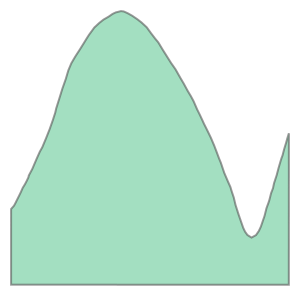

In [60]:
gdf.loc[0].geometry

In [61]:
type(gdf.loc[0].geometry)

shapely.geometry.polygon.Polygon

## Plotting Data

The data can be plotted using the built-in `GeoPandas` plotting functions and by adding additional `Matplotlib` commands like grids or axes labels. By passing the argument `column='formation'`, we can color the different Polygons according to their associated formation.

Text(164.95174818311068, 0.5, 'Y [m]')

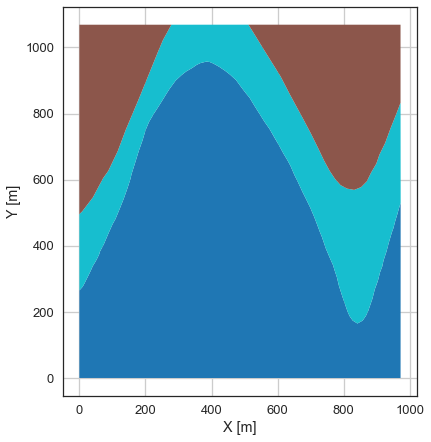

In [62]:
gdf.plot(aspect='equal', column='formation')
plt.grid()
plt.xlabel('X [m]')
plt.ylabel('Y [m]')

## Extracting XY Coordinates

For the geomodeling with `GemPy` or other packages, the X and Y coordinates of the `shapely` polygons need to be extracted. The extraction of the X and Y values for polygons consists of several steps:

- Exploding Polygons to MultiLineStrings and LineStrings
- Exploding MultiLineStrings to LineStrings
- Extracting Coordinates from LineStrings

Each step will now be introduced.

## Exploding Polygons to MultiLineStrings and LineStrings

The first step is to explode the Polygons to MultiLineStrings and LineStrings. Since the original data does not contain any MultiLineStrings, a MultiLineString is created manually from the two LineStrings belonging to the formation `Sand2`.

In [63]:
gdf_linestrings = gpd.GeoDataFrame(gdf.drop('geometry', axis=1), geometry=gdf.boundary, crs=gdf.crs)
gdf_linestrings

,id,formation,geometry
0,None,Sand1,"LINESTRING (0.256 264.862, 10.593 276.734, 17...."
1,None,Ton,"LINESTRING (0.256 264.862, 0.188 495.787, 8.84..."
2,None,Sand2,"LINESTRING (0.188 495.787, 0.249 1068.760, 278..."
3,None,Sand2,"LINESTRING (511.675 1068.852, 971.698 1068.800..."


A new GeoDataFrame with a MultiLineString is created.

In [64]:
from shapely.geometry import MultiLineString
gdf2 = gpd.GeoSeries(data = MultiLineString([gdf_linestrings.loc[2].geometry,gdf_linestrings.loc[3].geometry])).to_frame()
gdf2['formation']='Sand2'
gdf2['id'] = None
gdf2.columns = ['geometry','formation', 'id' ]
gdf2

,geometry,formation,id
0,"MULTILINESTRING ((0.188 495.787, 0.249 1068.76...",Sand2,None


The original and the new GeoDataFrame are concated.

In [65]:
gdf_linestring = pd.concat([gdf_linestrings, gdf2]).reset_index()
gdf_linestring

,index,id,formation,geometry
0,0,None,Sand1,"LINESTRING (0.256 264.862, 10.593 276.734, 17...."
1,1,None,Ton,"LINESTRING (0.256 264.862, 0.188 495.787, 8.84..."
2,2,None,Sand2,"LINESTRING (0.188 495.787, 0.249 1068.760, 278..."
3,3,None,Sand2,"LINESTRING (511.675 1068.852, 971.698 1068.800..."
4,0,None,Sand2,"MULTILINESTRING ((0.188 495.787, 0.249 1068.76..."


The two duplicated rows for the formation `Sand2` are dropped. 

In [66]:
gdf_linestring = gdf_linestring.drop(gdf_linestring.index[[2,3]]).reset_index()
gdf_linestring = gdf_linestring[['geometry','formation', 'id']]
gdf_linestring 

,geometry,formation,id
0,"LINESTRING (0.256 264.862, 10.593 276.734, 17....",Sand1,None
1,"LINESTRING (0.256 264.862, 0.188 495.787, 8.84...",Ton,None
2,"MULTILINESTRING ((0.188 495.787, 0.249 1068.76...",Sand2,None


This step can also be done with the function `explode_polygons`, which will return in our case only LineStrings as indicated before.

In [67]:
gdf_exploded = gg.vector.explode_polygons(gdf)
gdf_exploded

,id,formation,geometry
0,None,Sand1,"LINESTRING (0.256 264.862, 10.593 276.734, 17...."
1,None,Ton,"LINESTRING (0.256 264.862, 0.188 495.787, 8.84..."
2,None,Sand2,"LINESTRING (0.188 495.787, 0.249 1068.760, 278..."
3,None,Sand2,"LINESTRING (511.675 1068.852, 971.698 1068.800..."


## Exploding MultiLineStrings to LineStrings

The second step is to explode MultiLineStrings to LineStrings. Therefore, we will use the manually created GeoDataFrame containing one MultiLineString to demonstrate the functionality. This can easily be done using the built-in `explode()` method of Pandas. However, when doing that, we will get two index columns.

In [68]:
gdf_linestrings_exploded = gdf_linestring.explode()
gdf_linestrings_exploded

formation    id                                           geometry
0 0     Sand1  None  LINESTRING (0.256 264.862, 10.593 276.734, 17....
1 0       Ton  None  LINESTRING (0.256 264.862, 0.188 495.787, 8.84...
2 0     Sand2  None  LINESTRING (0.188 495.787, 0.249 1068.760, 278...
  1     Sand2  None  LINESTRING (511.675 1068.852, 971.698 1068.800...

Using `explode_multilinestrings` will automatically explode all LineStrings and reset the index by default. 

In [69]:
gdf_linestrings_exploded = gg.vector.explode_multilinestrings(gdf_linestring)
gdf_linestrings_exploded

,formation,id,geometry
0,Sand1,None,"LINESTRING (0.256 264.862, 10.593 276.734, 17...."
1,Ton,None,"LINESTRING (0.256 264.862, 0.188 495.787, 8.84..."
2,Sand2,None,"LINESTRING (0.188 495.787, 0.249 1068.760, 278..."
3,Sand2,None,"LINESTRING (511.675 1068.852, 971.698 1068.800..."


Setting `reset_index=False` will create the table as shown above.

In [70]:
gdf_linestrings_exploded = gg.vector.explode_multilinestrings(gdf_linestring, reset_index=False)
gdf_linestrings_exploded

formation    id                                           geometry
0 0     Sand1  None  LINESTRING (0.256 264.862, 10.593 276.734, 17....
1 0       Ton  None  LINESTRING (0.256 264.862, 0.188 495.787, 8.84...
2 0     Sand2  None  LINESTRING (0.188 495.787, 0.249 1068.760, 278...
  1     Sand2  None  LINESTRING (511.675 1068.852, 971.698 1068.800...

By default, the additionally created columns `level0` and `level1` when resetting the index are dropped. However, they can also be kept.

In [71]:
gdf_linestrings_exploded = gg.vector.explode_multilinestrings(gdf_linestring, reset_index=True, drop_level0=False, drop_level1=False)
gdf_linestrings_exploded

,level_0,level_1,formation,id,geometry
0,0,0,Sand1,None,"LINESTRING (0.256 264.862, 10.593 276.734, 17...."
1,1,0,Ton,None,"LINESTRING (0.256 264.862, 0.188 495.787, 8.84..."
2,2,0,Sand2,None,"LINESTRING (0.188 495.787, 0.249 1068.760, 278..."
3,2,1,Sand2,None,"LINESTRING (511.675 1068.852, 971.698 1068.800..."


Now that we only have LineStrings in the GeoDataFrame, we can use the function `extract_xy_linestrings` to extract the X and Y coordinates. By default, the `level0` and `level1` columns are dropped but can be kept setting the dropping arguments to `False`. 

In [72]:
gdf_xy = gg.vector.extract_xy_linestrings(gdf_linestrings_exploded)
gdf_xy

,formation,geometry,X,Y
0,Sand1,POINT (0.256 264.862),0.26,264.86
1,Sand1,POINT (10.593 276.734),10.59,276.73
2,Sand1,POINT (17.135 289.090),17.13,289.09
3,Sand1,POINT (19.150 293.313),19.15,293.31
4,Sand1,POINT (27.795 310.572),27.80,310.57
...,...,...,...,...
264,Sand2,POINT (636.023 859.788),636.02,859.79
265,Sand2,POINT (608.851 912.396),608.85,912.40
266,Sand2,POINT (560.110 990.617),560.11,990.62
267,Sand2,POINT (526.375 1045.388),526.38,1045.39


<a id='ex4'></a>
# Extract XY from any type of Geometry

**All introduced functions are combined to the function `extract_xy(...)` taking the loaded vector data as GeoDataFrame as input and the introduced arguments to drop columns, reproject the coordinates or clip the coordinates with a bounding box.**

<a id='summary'></a>
# Summary

In this tutorial it was shown how to 
- Extract XY coordinates from points using `extract_xy_points()`
- Extract XY coordinates from linestrings using `extract_xy_linestrings()`
- Explode Polygons using `explode_polygons()`
- Explode MultiLineStrings using `explode_multilinestrings()`
- Explode all types of Geometry using `extract_xy()`

In the next tutorial, the functionality to extract height information from a raster will be introduced.


In [77]:
gdf.loc[0].geometry.bounds

(0.23613746702971916,
 -0.006899458905866851,
 972.0889039630482,
 957.2890728572154)